In [ ]:
import tensorflow as tf

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aarushverma","key":"a556b53644acf230d4623a725d843ac2"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 91% 168M/185M [00:01<00:00, 127MB/s]
100% 185M/185M [00:01<00:00, 153MB/s]


In [ ]:
!unzip /content/az-handwritten-alphabets-in-csv-format.zip -d Data

Archive:  /content/az-handwritten-alphabets-in-csv-format.zip
  inflating: Data/A_Z Handwritten Data.csv  
  inflating: Data/A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [ ]:
!mkdir images

In [ ]:
import csv
from PIL import Image
import numpy as np
import pandas as pd
import string
import os
 
csv_File_Path = '/content/Data/A_Z Handwritten Data.csv'# Downloded csv file path
 
count = 1
last_digit_Name =  None
 
image_Folder_Path = '/content/images'# Target folder path
 
Alphabet_Mapping_List = list(string.ascii_uppercase)
 
for alphabet in Alphabet_Mapping_List:
    path = image_Folder_Path + '/' + alphabet
    if not os.path.exists(path):
        os.makedirs(path)
with open(csv_File_Path, newline='') as csvfile:     #codecs.open(csv_File_Path, 'r', encoding = 'utf8', errors='ignore')
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in reader:
        digit_Name = row.pop(0)
        image_array = np.asarray(row)
        image_array = image_array.reshape(28, 28)
        new_image = Image.fromarray(image_array.astype('uint8'))
 
        if last_digit_Name != str(Alphabet_Mapping_List[(int)(digit_Name)]):
            last_digit_Name = str(Alphabet_Mapping_List[(int)(digit_Name)])
            count = 0
            print ("")
            print ("Prcessing Alphabet - " + str (last_digit_Name))
        
        image_Path = image_Folder_Path + '/' + last_digit_Name + '/' + str(last_digit_Name) + '-' + str(count) + '.png'
        new_image.save(image_Path)
        count = count + 1
 
        if count % 1000 == 0:
            print ("Images processed: " + str(count))


Prcessing Alphabet - A
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000
Images processed: 13000

Prcessing Alphabet - B
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000

Prcessing Alphabet - C
Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000
Images processed: 13000
Images processed: 14000
Images processed: 15000
Images processed: 16000
Images processed: 17000
Images processed: 18000
Images processed: 

In [ ]:
batch_size = 32
image_height = 28
image_width = 28

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images', 
    validation_split = 0.2, 
    subset = 'training',
    labels='inferred',
    label_mode='categorical',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 372451 files belonging to 26 classes.
Using 297961 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images', 
    validation_split = 0.2, 
    labels='inferred',
    label_mode='categorical',
    subset = 'validation',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 372451 files belonging to 26 classes.
Using 74490 files for validation.


In [ ]:
for data in train_ds:
    print(data[1].shape)
    break

(32, 26)


In [ ]:
from tensorflow.keras import layers
num_classes = 26

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, activation='relu'),
#     layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.CategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10)

Epoch 1/10
9312/9312 [==============================] - 237s 22ms/step - loss: 0.2956 - accuracy: 0.9176 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 2/10
9312/9312 [==============================] - 199s 21ms/step - loss: 0.0644 - accuracy: 0.9821 - val_loss: 0.0540 - val_accuracy: 0.9854
Epoch 3/10
9312/9312 [==============================] - 196s 21ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.0498 - val_accuracy: 0.9863
Epoch 4/10
9312/9312 [==============================] - 196s 21ms/step - loss: 0.0349 - accuracy: 0.9900 - val_loss: 0.0482 - val_accuracy: 0.9869
Epoch 5/10
9312/9312 [==============================] - 194s 21ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0401 - val_accuracy: 0.9899
Epoch 6/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0462 - val_accuracy: 0.9887
Epoch 7/10
9312/9312 [==============================] - 192s 21ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


P


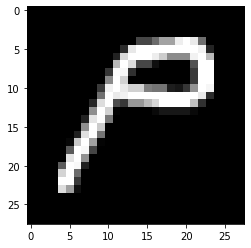

In [ ]:
import matplotlib.pyplot as plt
l = list(string.ascii_uppercase)
for image, labels in train_ds.take(1):
  i = 5
  pred = model.predict_classes(image)
  plt.imshow(image[i]/255)
  print(l[pred[i]])